In [1]:
import os

import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams["font.family"] = "Arial"

from src.analysis.mechanisms import EI
from src.analysis.mechanisms import ablations

%load_ext autoreload
%autoreload 2

In [2]:
dark_blue = "#1f78b4"
dark_green = "#33a02c"
dark_red = "#e31a1c"
dark_pink = "deeppink"

In [3]:
root = os.path.expanduser("~/PycharmProjects/SpikeToExcite")
model_root = f"{root}/data"
data_root = "/home/datasets/natural"  # Set the path of the natural dataset
model_id = "prediction_0.0017782794100389228_0.3_0.1_0_17_0.2_0.5"

### Fraction of seizures

In [4]:
ablation_analysis = ablations.ClipAblationAnalysis(root, model_id, data_root)

In [5]:
def plot(y_lim, x_lim, x_label, y_label, ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_linewidth(2)
    ax.spines["left"].set_linewidth(2)
    fs = 20
    ax.xaxis.set_tick_params(width=3, labelsize=fs, pad=8)
    ax.yaxis.set_tick_params(width=3, labelsize=fs, pad=8)
    ax.set_ylim(y_lim)
    ax.set_xlim(x_lim)
    ax.set_xlabel(x_label, fontsize=fs, labelpad=4)
    ax.set_ylabel(y_label, fontsize=fs, labelpad=4)

def plot_frame(frame, ax):
    ax.set_xticks([])
    ax.set_yticks([])
    edge_width = 1
    ax.spines["left"].set_linewidth(edge_width)
    ax.spines["right"].set_linewidth(edge_width)
    ax.spines["top"].set_linewidth(edge_width)
    ax.spines["bottom"].set_linewidth(edge_width)
    ax.set_aspect("auto")
    ax.imshow(frame, vmin=-1, vmax=2, cmap="gray")

def plot_firing(control_response, ablated_response, ylim, ax):
    plot((0, ylim), (0, len(control_response)), "Time (s)", "Pop. firing rate (Hz)", ax)
    ax.plot(control_response, linewidth=3, label="Full clip response", c=dark_pink)
    ax.plot(ablated_response,  linewidth=2, label="Masked clip response", c="indigo")
    ax.set_yticks([0, ylim])
    ax.set_yticklabels([0, int(ylim*120)])
    ax.set_xticks([0, len(control_response)])
    ax.set_xticklabels([0, 10])

    return ax

In [6]:
clip_idx = 12

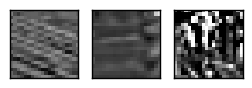

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(3, 3))
plot_frame(ablation_analysis.ablated_clips[clip_idx, 0][0].cpu(), axs[0])
plot_frame(ablation_analysis.ablated_clips[clip_idx, 0][300].cpu(), axs[1])
plot_frame(ablation_analysis.ablated_clips[clip_idx, 0][600].cpu(), axs[2])
plt.savefig(f"{root}/figures/fig5/clip.svg", format="svg", transparent=False, bbox_inches="tight")

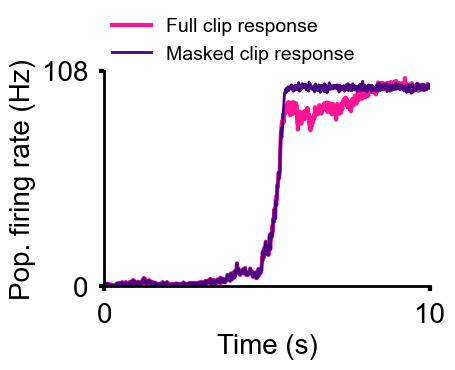

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(4.2, 2.8))

c_out = ablation_analysis.full_clip_responses.spikes.mean(1).cpu()[clip_idx]
s_out = ablation_analysis.ablated_clip_responses.spikes.mean(1).cpu()[clip_idx]
plot_firing(c_out, s_out, ylim=0.9, ax=ax)

leg = ax.legend(loc=(0, 1), fontsize=14, frameon=False)
leg.get_title().set_fontsize(14)

plt.savefig(f"{root}/figures/fig5/ablation_response.svg", format="svg", transparent=False, bbox_inches="tight")

/tmp/ipykernel_3840880/3925790745.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_3840880/3925790745.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels("{:.0f}".format(y * 100) for y in ax.get_yticks())


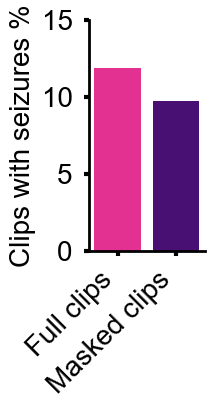

In [10]:
def plot_fraction_of_seizures(frac_of_clips_with_seizures, frac_of_clips_with_seizures_following_ablation, ax):
    plot((0, 0.15), (0, 2), "", "Clips with seizures %", ax)
    sns.barplot(pd.DataFrame([{"Full clips": frac_of_clips_with_seizures, "Masked clips": frac_of_clips_with_seizures_following_ablation}]), palette=[dark_pink, "indigo"], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_yticklabels("{:.0f}".format(y * 100) for y in ax.get_yticks())

fig, ax = plt.subplots(1, 1, figsize=(1.5, 3))
frac_of_clips_with_seizures, frac_of_clips_with_seizures_following_ablation = ablation_analysis.get_seizure_clip_fraction()
plot_fraction_of_seizures(frac_of_clips_with_seizures, frac_of_clips_with_seizures_following_ablation, ax=ax)
plt.savefig(f"{root}/figures/fig5/seizure_occurence.svg", format="svg", transparent=False, bbox_inches="tight")

In [11]:
frac_of_clips_with_seizures, frac_of_clips_with_seizures_following_ablation 

(0.1185, 0.0975)

### EI imbalance

In [12]:
EI_analysis = EI.EIAnalysis(root, model_id, data_root=data_root)

In [13]:
control_ex, control_in, _ = EI_analysis.EI_stats_for_control_model_for_provocative_input.get_raw_cc()
seizure_ex, seizure_in, _ = EI_analysis.EI_stats_for_seizure_model_for_provocative_input.get_raw_cc()

In [15]:
EI_ratio_df = EI_analysis.get_EI_ratio_df()
EI_CC_df = EI_analysis.get_EI_CC_df()

In [16]:
def plot_EI_currents(raw_ex, raw_in, i, ax):
    ax.plot(raw_ex[i][:20000], c=dark_red)
    ax.plot(raw_in[i][:20000], c=dark_blue)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    time_pos = 0
    time_ms = 10000
    amplitude_pos=-12
    ax.plot([time_pos, time_pos + int(time_ms/8.333)], [amplitude_pos, amplitude_pos], color="k", lw=2)
    ax.plot([time_pos+40, time_pos+40], [amplitude_pos, amplitude_pos+3], color="k", lw=2)
    ax.set_xlim([0, 20000])

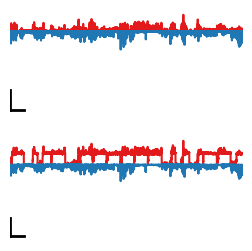

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(3, 3))
i=563
plot_EI_currents(control_ex, control_in, i=i, ax=ax[0])
plot_EI_currents(seizure_ex, seizure_in, i=i, ax=ax[1])
plt.savefig(f"{root}/figures/fig5/EI_currents.svg", format="svg", transparent=False, bbox_inches="tight")

In [18]:
query = (EI_CC_df["stimulus"] == "provocative") & (EI_CC_df["model"] == "healthy")
CC = EI_CC_df[query].iloc[i]["CC"]
ratio = EI_ratio_df[query].iloc[i]["ratio"]
print(f"Control model unit={i} during provocative simulus CC={CC:.2} ratio={ratio:.2}")

Control model unit=563 during provocative simulus CC=0.72 ratio=1.3


In [19]:
query = (EI_CC_df["stimulus"] == "provocative") & (EI_CC_df["model"] == "seizure")
CC = EI_CC_df[query].iloc[i]["CC"]
ratio = EI_ratio_df[query].iloc[i]["ratio"]
print(f"Seizure model unit={i} during provocative simulus CC={CC:.2} ratio={ratio:.2}")

Seizure model unit=563 during provocative simulus CC=0.4 ratio=7.5


In [20]:
def plot_EI_ratio(EI_ratio_df, ax): # order=["healthy", "seizure"],
    plot((0, 7.03), (0, 2), "", "EI ratio", ax)
    sns.barplot(EI_ratio_df, x="stimulus", y="ratio", hue="model", estimator="median", errorbar="se", capsize=0.05, palette=[dark_pink, "black"], ax=ax)
    ax.set_xticklabels(["Non-prov. stim.", "Prov. stim."], rotation=45, ha="right")
    ax.set_xlabel("")
    ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7])

def plot_EI_CC(EI_CC_df, ax):
    plot((0, 1), (0, 2), "", "EI CC", ax)
    sns.barplot(EI_CC_df, x="stimulus", y="CC", hue="model", estimator="median", errorbar="se", capsize=0.05, palette=[dark_pink, "black"], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_xticklabels(["Non-prov. stim.", "Prov. stim."], rotation=45, ha="right")
    ax.set_xlabel("")
    # ax.set_yticklabels("{:.0f}".format(y * 100) for y in ax.get_yticks())

/tmp/ipykernel_3840880/2425144122.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Non-prov. stim.", "Prov. stim."], rotation=45, ha="right")
/tmp/ipykernel_3840880/2425144122.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_3840880/2425144122.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Non-prov. stim.", "Prov. stim."], rotation=45, ha="right")


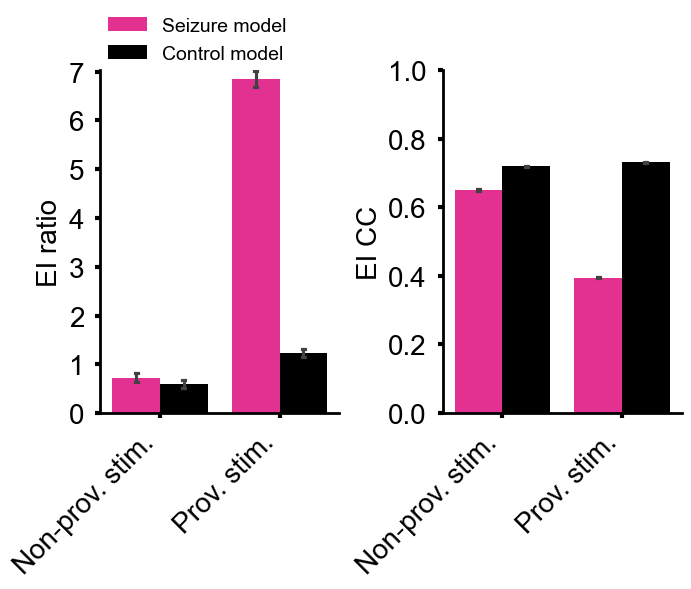

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(7, 6))

plot_EI_ratio(EI_ratio_df, ax[0])
plot_EI_CC(EI_CC_df, ax[1])
leg = ax[0].legend(loc=(0, 1), fontsize=14, frameon=False)
leg.get_title().set_fontsize(14)
new_labels = ["Seizure model", "Control model"]
for i, text in enumerate(leg.get_texts()):
    text.set_text(new_labels[i])
ax[1].get_legend().remove()
fig.tight_layout()
plt.savefig(f"{root}/figures/fig5/EI_quant.svg", format="svg", transparent=False, bbox_inches="tight")

In [22]:
EI.EIAnalysis.plot_ratio_stats(EI_ratio_df)
EI.EIAnalysis.plot_CC_stats(EI_CC_df)

EI ratio
Non-provocative: seizure median (0.73) control median (0.59) p=0.000795509104855883
Provocative: seizure median (6.85) control median (1.23) p=4.713037384526336e-116
EI CC
Non-provocative: seizure median (0.65) control median (0.72) p=2.0378709940779868e-110
Provocative: seizure median (0.39) control median (0.73) p=1.4315683093563622e-197


## Supplementary

In [24]:
EI_CC7_df = EI_analysis.get_EI_CC_df(7)
EI_CC11_df = EI_analysis.get_EI_CC_df(11)

In [25]:
EI.EIAnalysis.plot_CC_stats(EI_CC7_df)
EI.EIAnalysis.plot_CC_stats(EI_CC11_df)

EI CC
Non-provocative: seizure median (0.59) control median (0.67) p=6.0821230227814116e-93
Provocative: seizure median (0.37) control median (0.69) p=1.4315683093563622e-197
EI CC
Non-provocative: seizure median (0.69) control median (0.75) p=9.445735872516972e-125
Provocative: seizure median (0.41) control median (0.76) p=1.4315683093563622e-197


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 6))

plot_EI_CC(EI_CC8_df, ax[0])
plot_EI_CC(EI_CC10_df, ax[1])
leg = ax[0].legend(loc=(0, 1), fontsize=14, frameon=False)
leg.get_title().set_fontsize(14)
new_labels = ["Seizure model", "Control model"]
for i, text in enumerate(leg.get_texts()):
    text.set_text(new_labels[i])
ax[1].get_legend().remove()
fig.tight_layout()
plt.savefig(f"{root}/figures/supp/EI_quant.svg", format="svg", transparent=False, bbox_inches="tight")